# Inferential Statistics reference items

__[Markdown help](https://medium.com/ibm-data-science-experience/markdown-for-jupyter-notebooks-cheatsheet-386c05aeebed)__
, __[More Markdown help](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#code)__, 
__[Latex Cheatsheet](https://wch.github.io/latexsheet/latexsheet-1.png)__,
__[Latex Primer](http://data-blog.udacity.com/posts/2016/10/latex-primer/)__

[iPython Cookbook](https://ipython-books.github.io/)

This notbook focus' on Inferential Statistics however contains some [data creation](#Create) information as well.

In [19]:
import numpy as np
import pandas as pd
import scipy.stats as st  # for z-scores and t-scores etc
#from scipy import stats
import statsmodels.stats.weightstats as weightstats
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] =  \
                    (7,4)

# explore http://okfnlabs.org/blog/2016/04/19/pdf-tools-extract-text-and-data-from-pdfs.html
# for automating weekly reporting

In [37]:
# seeing what is available in a package to troubleshoot import failures
import types

module = None
if module:
    print([getattr(module, a) for a in dir(module)
      if isinstance(getattr(module, a), types.FunctionType)])
    print('\n'.join([str(
        module.__dict__.get(a).__name__) for a in dir(module) if isinstance(
        module.__dict__.get(a), types.FunctionType)]))

### Distribution types:

- **__[Bernoulli distribution](https://en.wikipedia.org/wiki/Bernoulli_distribution)__** single test of a random variable - a variable where probability of success = p and failure is 1-p (only two outcomes possible). Discrete. (special case of Binomial where n = 1, also special case of two point distribution where outcome doesn't have to be 0 or 1)
- **__[Binomial distribution](https://en.wikipedia.org/wiki/Binomial_distribution)__** is the sum of independent and identically distributed Bernoulli random variables. Discrete. <br>To calculate population proportions $p$: $mean = \frac{n*p}{n} = p$, $\sigma = \sqrt{\frac{p*(1-p)}{n}}$
- **__[Poisson distribution](https://en.wikipedia.org/wiki/Poisson_distribution)__**, when the timing of the next event is completely independent of the last event, but there is a well defined mean. Its continuous, (a limit of Binomial when p(success) is low ie for rare events, and n is large)
- **__[Exponential distribution](https://en.wikipedia.org/wiki/Exponential_distribution)__**, the wait times between arrival of Poisson process is Exponentially distributed.
- **__[Normal distribution](https://en.wikipedia.org/wiki/Normal_distribution)__**, (Gaussian) Used in the natural and social sciences to represent real-valued random variables whose distributions are not known.
- **__[Student's t-distribution](https://en.wikipedia.org/wiki/Student%27s_t-distribution)__**, a family of distributions with slightly fatter tails that give better confidence intervals when the sample size is small and population standard deviation is unknown.


### Terminology
 - **__[Variance](https://en.wikipedia.org/wiki/Variance)__** is the expectation of the squared deviation of a random variable from its mean. Informally, it measures how far a set of (random) numbers are spread out from their average value. ($\sigma^2$), (remember variance can be affected by degrees of freedom important for t tests)
 - **__[Standard Deviation](https://en.wikipedia.org/wiki/Standard_deviation)__** the square root of the Variance of a population
 - **__[Skew in a distribution](https://en.wikipedia.org/wiki/Skewness)__** Positive skew means you have  a larger tail to the right and the skewed max is actually to the left of the real mean/max (max skewed to left)
Neg skew means long tail to the left and the peak of the skewed distribution is to the right of the actual/normal mean (max skewed to right)
 - **__[Kurtosis](https://en.wikipedia.org/wiki/Kurtosis)__** skews off normal in other ways:
positive kurtosis means fatter tails and a pointier peak - still around the mean though - think high flat land and pointy rocket
negative kurtosis have lower peak and lower tails - think water droplet sitting on a table
 - **z** things are taken from the normal distributions, **t** things from the t-student distribution
 - **z score**: how many $\sigma$'s or standard deviations away from the mean a value is. $\frac{(x - \bar x)}{\sigma}$
 - **z* or critical value**: $z^*$ is the $z$ value that gives the confidence interval we are looking for. 
 - **z-intervals** are confidence intervals taken from standard normal curves (ones where area under curve is normed aka =1)
 - **Simple Random Sample** aka SRS 
 - **__[Confidence Intervals](https://en.wikipedia.org/wiki/Confidence_interval)__** If we repeated measurements over and over again, $p%$ of the observed values would lie within the $p%$ confidence interval. It refers to the long-term success rate of the method, that is, how often this type of interval will capture the parameter of interest. A range of plausible values for the parameter of interest if you like.
    - DON'T SAY: ~~"There is a 95%, percent chance that this specific interval contains the true mean"~~
    - **SAY**: "we're 95%, percent confident that this interval captured the mean"
 - **__[Prediction Intervals](https://en.wikipedia.org/wiki/Prediction_interval#Unknown_mean.2C_unknown_variance)__** gives an estimate of range for reasonable measurements. [example notebook](https://github.com/ScottWPiraino/Springboard_Data_Science/blob/master/EDA/body_temp/ci_vs_pi.ipynb)
 - **__[Central Limit Therorem](https://en.wikipedia.org/wiki/Central_limit_theorem)__** So long as your population has a well defined mean and variance (or SD) then when independent random variables are added, their properly normalized sum tends toward a normal distribution (informally a "bell curve") even if the original variables themselves are not normally distributed. This also applies to their means.
 - **__[Least Squared Fit](https://en.wikipedia.org/wiki/Least_squares)__** technique
   - residual $r$ is the distance from the model $y$ value to the actual data $y$ value.
   - Least Squared Fit minimizes the RSS (residual sum of squares):
       
$$S = \sum_{i=1}^{n} r_{i}^2$$

 - **Nonparametric inference** - Make no assumptions about the model or probability distribution underlying the data
 - **Parametric inference** - when you do make assumptions about the underlying data and the model has parameters that you optimize
 
 - **Test statistic** - A single number that can be computed from observed data and from data you simulate under the null hypothesis. It serves as a basis of comparison between the two examples:
   - if H0 = two distributions are the same test the difference of their means
 - **P-value** - The probability of obtaining a value of your test statistic that is at least as extreme as what was observed, under the assumption the null hypothesis is true
   - ITS NOT ~~the probability that the null hypothesis is true~~
 - **Statistical significance** (aka significance level or $\alpha$) - Determined by the smallness of a p-value, if two tail consider both sides of the distribution, if p-value is smaller than 0.05 in a two tail test then it is 90% Statistically Significant.
 
 - **Null hypothesis significance testing (NHST)** - using Statistical Significance to test a null hypothesis

- **[Pearson Correlation Coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient)** - a measure of how much of the variability in two variables is due to them being correlated. $\rho$ (rho) defined as the ratio of the covariance to the geometric mean of the variances (ie their sd of the two data sets [How to calculate](#PCoeff)

For Populations: 
$$\rho_{X,Y} = \frac{cov(X,Y)}{\sigma_X\sigma_Y}$$

  -  $cov$  is the covariance<br>
  -  $\sigma_{X}$ is the standard deviation of $X$<br>
  -  $\sigma_{Y}$ is the standard deviation of $Y$<br>

For Samples: 
$$ r = \frac{\sum_{i=1}^n(x_i-\bar x)(y_i-\bar y)}{\sqrt{\sum_{i=1}^n(x_i-\bar x)^2}\sqrt{\sum_{i=1}^n(y_i-\bar y)^2}}$$

  -  n is the sample size<br>
  -  $x_{i},y_{i}$ are the individual sample points indexed with i<br>
  -  $\bar x ={\frac {1}{n}}\sum _{i=1}^{n}x_{i}$ (the sample mean); and analogously for $\bar {y}$<br>
  -  the denominator is in fact the Geometric Mean of the variances

- **[Geometric Mean](https://en.wikipedia.org/wiki/Geometric_mean)** - mean by using the product of their values (as opposed to the arithmetic mean which uses their sum). The geometric mean is defined as the nth root of the product of n numbers.

### Taking a Sample from a population
By the Central Limit Therorem when you take multiple samples from a population and calculate the average of the samples and then plot your values you end up with a normal distribution, around the mean of the distribution. Calculating the sum, mean, mode you end up with a normal distribution. (mean most commonly used).
*  if you increase the number of samples you take you'll get closer to a normal dist with a smaller $\sigma$,
*  if you increase the number of times you sample the population you will also get closer to a normal distribution.

<br>$p$ = proportion of the population of interest
<br>$\hat p$ = proportion of the sample population of interest
<br>Standard Error = use $\hat p$ as in an estimation for $p =\frac{\sqrt{\hat p*(1-\hat p)}}{n}$

### Taking a mean of a population
The standard error of the mean is the standard deviation of the sampling distribution of the mean.
<br>$\sigma_{pop}$ is usually not known so use $s$ as an estimate
<br>$s$ = standard distribution of the sample $\sigma_{sample}$
<br>Standard Error of the mean = $\frac{s}{\sqrt{n}}$

### Creating a Prediction interval for a range (normally distributed - mean and sd of pop not known)
When wanting to predict a reasonable value for a next observation this provides a better range than the mean:
 - $t^* * s * \sqrt{1 + \frac{1}{n}}$
 - $s^2$ is the variance of the sample $s$ is the standard deviation of the sample
 - $t^*$ is the critical t value 
 
 [see wikipeadia](https://en.wikipedia.org/wiki/Prediction_interval)
 [and this notebook](https://github.com/ScottWPiraino/Springboard_Data_Science/blob/master/EDA/body_temp/ci_vs_pi.ipynb)

### Model types and techniques:

- **Hypothesis Testing (General steps)**
   - step 1: define null hypothesis
   - step 2: Defind your test statistic
   - step 3: Generate many sets of simulated data assuming the null hypothesis is true
       - may need to combine two sets of data when assuming the null hypothesis - ie pooled_mean
       - may need to shift two sets of data to have same mean - then use shifted data when gen samples
   - step 4: Compute the test statistic for each simulated data set (and for your observed data)
   - step 5: Compute p-value. It is the fraction of your simulated data sets for which the test statistic is at least as extreme as for the real data.

- **Bootstrapping (resampling with replacement)** Estimated result
   - Assume a model, 
   - take your data and re-sample it, with replacement, multiple times to generate many bootstrapped samples
   - calculate the bootstrapped replicate (the stat that you are interested in) for each bootstrapped sample. 
   - compare the sample distribution that you get from this 'bootstrapped' data to the one you actually get
   <br>Example code [for 1D data](#BS_1D), [for 2D data](#BS_2D)

- **Permutation tests (permuting the key aspect of your data before resampling)** Accurate result
   - identify your hypothesis, and test statistic (eg difference of mean)
   - take your data permute it (often this is effectively up labels), multiple times to generate many samples.
   - calculate the replicate (the stat that you are interested in) for each permuted sample. 
   - compare the sample distribution that you get from this 'permuted' data to the one you actually get (merge the data if appropriate to increase accuracy of estimate)
   - hard to do a One Sample Test (compare one set of data to a single number eg mean) with a permutation test, but possible [see this SE answer](https://stats.stackexchange.com/a/171748/198505) - shift mean to 0 and permute the signs
   <br>Example code, [for 2D data](#PT-2D)

- **Using Hacker Statistics (self generated stats)** NOT VALID
   - Assume a model, 
   - generate data that fits that model (pick model parameters carefully, often from your sample), 
   - sample your 'hacked' data multiple times, 
   - compare the sample distribution that you get from this 'hacked' data to the one you actually get
   <br>[Example code](#HS_Norm)

- **Linear Regression** - calculating the best fit straight line to the data
    - take data, select your error measurement (what you are going to minimize to pick the best fit - eg Least Squared Fit)
    - calculate the error and find its min
    - plot data and best fit line
    <br>[example code](#LinReg_LSF)

### Types of tests
[Good reference blog](http://blog.minitab.com/blog/adventures-in-statistics-2/understanding-t-tests-1-sample-2-sample-and-paired-t-tests)
- one sample test, take one sample and compare it to the population
- two sample test, takes samples from two independent groups and compares them [example 1](https://www.itl.nist.gov/div898/handbook/eda/section3/eda353.htm), [example 2](https://stackoverflow.com/a/22613361/1215012)
- pairs test, take two samples, compute the difference and then compare it to population (one sample test on difference)


### z tests
*  **The Random Condition** Must have random sampling (or we can't trust our samples and the measurements we are getting)
*  **The Normal Condition** Must be dealing with a sample proportion that is approximately normal - so need to be getting per sample 10 or more success' and 10 or more failures - can't usually calculate this as don't know enough about true pop, so just count what you are seeing in your sample.
*  **The Independence condition** true sampling would be with replacement and you might get the same person again, so just make sure your sample size n is less than 10% of the population.



When calculating proportions
$$ Error Margin =  z^* * \sqrt{\frac{p * (1-p)}{n}}$$

- H0 = p1
- Ha != p1
- $p_{pop}$ => $n$ => $\hat p$           from pop take sample n, and calculate sample proportion
- calc $z$-stat = $\frac{(\hat p - p_0)}{\sigma_{\hat p}}$    calc z-stat by taking the assumed pop proportion from the sample proportion and div by sd of the sample proportion (z-stat is how many sd away from pop proportion)
- $\sigma_{\hat p} = \sqrt{\frac{p_0*(1-p_0)}{n}} $     how to calc standard deviation of the proportion as we know the pop proportion (we're assuming it to be p0 in our hyp)
(this is usually called the standard error of the statistic)
- use z-stat to figure out p-value    p-value is probability that this result occured by chance (think about tails)
- compare with alpha                  statistical significance is 1-alpha pick alpha before you start

### t tests
[A good reference web page](https://towardsdatascience.com/inferential-statistics-series-t-test-using-numpy-2718f8f9bf2f), <nbsp> 
[Another good summary](
https://www.bmj.com/about-bmj/resources-readers/publications/statistics-square-one/7-t-tests)
[Tech summary of terms and equations](https://ncss-wpengine.netdna-ssl.com/wp-content/themes/ncss/pdf/Procedures/NCSS/One-Sample_T-Test.pdf)
 -  **The Random Condition** Must be random
 -  **The Normal Condition** n>=30, if smaller, but original is normal or approx symmetric around mean
 -  **The Independence Condition** if sampling without replacement - need to have sample that is less than 10% of population

When calculating means, where $s$ is the standard deviation of the sample we use $s$ as we don't usually know $\sigma_{pop}$
$$ Error Margin =  t^* * \frac{s}{\sqrt{n}}$$

- H0 = mu0
- Ha != mu
- $p_{pop}$ => $n$ => $\bar x$, $\sigma_x$   from pop take sample $n$, and calculate sample mean $\bar x$ and sample standard deviation ($\sigma_x$)
- try to cal $z = \frac{(\bar x - \mu_0)}{\sigma_{\bar x}}$      $\mu_0$ is the null hypothesis value
   -  $\sigma_{\bar x} = \frac{\sigma_{pop}}{\sqrt{n}}$          but we don't know the true standard distribution of the population so this isn't easy to calculate so we use an estimate
   - $t = \frac{(\bar x - \mu_0)}{\frac{\sigma_x}{\sqrt{n}}}$          using estimate for the population standard distribution (use the sample standard distribution $\sigma_x$ sometimes you will see $s$)
- use t-stat in t tables to figure out p-value
- compare with alpha.

- get better results when you use n-1 rather than n in the denominator as samples always under estimate. This is for a two sample test.
    - $t = \frac{\bar x - \bar y}{\sqrt{\frac{S_x^2}{n_x} + \frac{S_y^2}{n_y}}}$    $S$ = the standard deviation for each sample, $n$ = number of obs per group.
    - $S^2 = \frac{\sum((x-\bar x)^2}{n-1}$    $x$ = individual obs, $\bar x$ = mean, n = number of obs in group

### How big a sample size do I need to take? (one sample z test, proportion statistic)
eg What proportion of a communities members favor a tax increase, Margin of error +/- 2% and 95% confidence level.
-  95% confidence level need 2.5% area outside both ends of the normal cure so a 97.5% cumulative probability
-  therefore $z*$ = 1.96
-  The proportion of the population that will make the error largest is 0.5 so we'll use that to calculate the n we need
$$ z^* * \sqrt{\frac{p * (1-p)}{n}} = 1.96 * \sqrt{\frac{0.5 * 0.5}{n}} < 0.02$$
$$n\_min = (\frac{z^*}{margin\_error})^2 * (0.5)^2$$

### Find the error margin from a one sample z test (proportion statistic)
500 song population, estimate the proportion that are by female artists
You take a simple random sample (SRS) and find that 20 are by females - two tail
 - check you assumptions
    - question says random sampling so that is ok
    - sample has 20 success' and 30 failures, both over 10 so can assume normal distribution
    - 50/500 is 10% so we are just good to assume independence of sampling
    
99% confident interval be for the proportion of female artists in the full population of 500?
 - proportion of females = 20/50 = 0.4
 - error margin = $ z^* * \sqrt{\frac{p * (1-p)}{n}}$

In [14]:
n = 50
f_sam = 20/n
standard_error = np.sqrt(f_sam*(1-f_sam)/n)
print('Standard error is : {:.4f}'.format(standard_error))
conf = 0.99
tail = 1-(1-conf)/2
crit_z = st.norm.ppf(tail)
print('Z critical value is : {:.4f}'.format(crit_z))
print('The proportion of female artists is {} +/- {:.5f}, {}% confidence'.format(f_sam,crit_z*standard_error,conf*100))

Standard error is : 0.0693
Z critical value is : 2.5758
The proportion of female artists is 0.4 +/- 0.17846, 99.0% confidence


# Useful Code snippets

## creating key plots:

### Finding a z value or critical z 
Python calculates left/lower-tail probabilities by default. If you want to determine the density points where 95% of the distribution is included, ie 2 tail you need to split the area:

In [15]:
p = 95
alpha = 1-p/100
z = 1.64

# one tail
crit_z = st.norm.ppf(p/100)
p_calc = st.norm.cdf(abs(z))
p_calc2 = st.norm.sf(abs(z))   # == 1 - st.norm.cdf(abs(z))

print('The one tail z value at which {}% of the norm curve area is to the left: {:.2f}'.format(p,crit_z))
print('The one tail probability of getting z value {} value: {:.2f}'.format(z, p_calc))
print('The sf survival function gives you 1-st.norm.cdf(z) : {:.2f}'.format(p_calc2))
      
p2 = alpha/2
print('To get {}% prob in two tails you need (1-{})/2 in one tail = {:.3f}'.format(p,1-alpha,p2))
print('The two tail z values at which {}% of the norm curve area is closer to the mean: {:.2f} to {:.2f}'.format(
    p,st.norm.ppf(p2),st.norm.ppf(1-p2)))

The one tail z value at which 95% of the norm curve area is to the left: 1.64
The one tail probability of getting z value 1.64 value: 0.95
The sf survival function gives you 1-st.norm.cdf(z) : 0.05
To get 95% prob in two tails you need (1-0.95)/2 in one tail = 0.025
The two tail z values at which 95% of the norm curve area is closer to the mean: -1.96 to 1.96


In [31]:
p = 95
alpha = 1-p/100
t = 1.64
degf = 4 # calculate from N-1

crit_t = st.t.ppf(0.975, len(data) - 1)

print('The one tail z value at which {}% of the norm curve area is to the left: {:.2f}'.format(p,st.t.ppf(p/100, df=degf)))
print('The one tail probability of getting z value {} value: {:.2f}'.format(t, st.t.cdf(abs(t), df=degf)))
print('The sf survival function gives you 1-st.norm.cdf(t) : {:.2f}'.format(st.t.sf(abs(t), df=degf)))

The one tail z value at which 95% of the norm curve area is to the left: 2.13
The one tail probability of getting z value 1.64 value: 0.91
The sf survival function gives you 1-st.norm.cdf(t) : 0.09


### Probability Density Function (__[PDF](https://en.wikipedia.org/wiki/Probability_density_function)__)
Using the normed or density key word means the the area under the cure adds to 1 and so the histogram approximates a PDF.

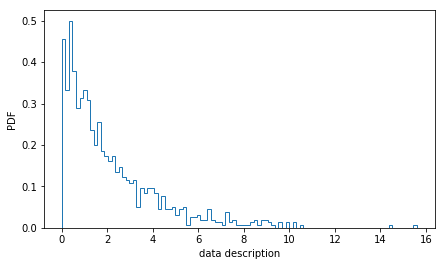

In [5]:
data = data = np.random.exponential(2,1000)
_ = plt.hist(data, bins=100, density=True, histtype='step')  # normed=True is depreciated
_ = plt.xlabel('data description')
_ = plt.ylabel('PDF')
plt.show()

### Empirical cumulative distribution function (ECDF)

In [6]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n
    return x, y

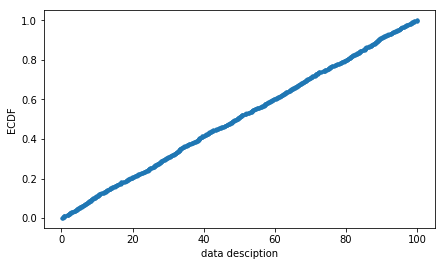

In [7]:
data = 100*np.random.rand(1000)
x, y = ecdf(data)
# Plot the ECDF
_ = plt.plot(x, y, '.')
_ = plt.xlabel('data desciption')
_ = plt.ylabel('ECDF')
plt.show()

### Plotting a CDF and PDF for comparison

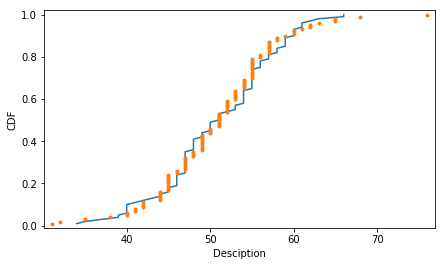

In [8]:
real_data = np.random.poisson(50,100)
created_data = np.random.binomial(1000,0.05,100)
# Create an ECDF from real data: x, y
x, y = ecdf(real_data)
# Create a CDF from theoretical samples: x_theor, y_theor
x_theor, y_theor = ecdf(created_data)

plt.plot(x_theor, y_theor)
plt.plot(x,y, marker='.', linestyle='none')

plt.margins(0.02)
plt.xlabel('Desciption')
plt.ylabel('CDF')

plt.show()

## Calculating Pearson correlation <a id="PCoeff"></a>

The Pearson correlation coefficient, known also as Pearson's r, ranges from -1 (indicating total negative linear correlation) to 1 (indicating total positive linear correlation).

In [9]:
x = 100*np.random.rand(1000)
y = list(map(lambda a: -a*2, x))

# returns the covariant matrix, [0,1] = [1,0] = covariance, 
# [0.0] is the variance of x, and [1,1] is the variance of y.
np.cov(x,y) 

array([[  829.12986847, -1658.25973694],
       [-1658.25973694,  3316.51947389]])

In [10]:
# returns the pearson correlation matrix, [0,1] = [1,0] = pearson coefficient, 
# [0,0] & [1,1] equal 1
np.corrcoef(x,y) 

array([[ 1., -1.],
       [-1.,  1.]])

In [11]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x,y)
    # Return entry [0,1]
    return corr_mat[0,1]

r = pearson_r(x, y)
print(r)

-1.0


### Other common test statistics<a id="ComTS"></a>
The pearson_r coefficient above can be used as a test statistic as can these other common functions:

In [12]:
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays.""" # the test stat in this case
    return np.mean(data_1)-np.mean(data_2)

# a fraction of a group or category if there are only two categories, one calc captures all the information.
def frac_yea_dems(cat_1, cat_2):
    """Compute fraction of Democrat yea votes."""
    frac = np.sum(cat_1) / len(cat_1)
    return frac

## Linear Regression with Least Squared Fit <a id="LinReg_LSF"></a>

- Assume your data has a linear relationship eg: $f=ai+b$
  ($a$ will be the slope of the line $b$ the intercept)
- use __[np.polyfit()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html)__ to find the two parameters $a$ and $b$
- plot them on a graph.



slope = 4.152253586802848 # of y / per unit of x
intercept = 237.3596841666081 y axis unit


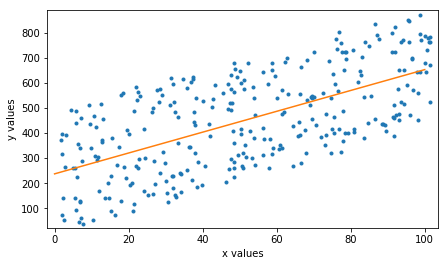

In [13]:
x_data = 100*np.random.rand(300) + 1.5
y_data = 2 + 4*x_data + 500*np.random.rand(300)   # adding random error to y

# Plot the data provided x versus y (this is the relationship or rate)
_ = plt.plot(x_data, y_data, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('x values')
_ = plt.ylabel('y values')

# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(x_data, y_data, deg=1)
print('slope =', a, '# of y / per unit of x')
print('intercept =', b, 'y axis unit')

# Make theoretical line to plot using the hypothesized model, 2 pts only as line is straight.
x = np.array([0,100])
y = a * x + b

# Add regression line to your plot
_ = plt.plot(x, y)
plt.show()

## Permutation test 2D Arrays<a id="PT-2D"></a>
Two examples here:
- `use_rain = True`   shows a continuous data set - comparing the rainfall in two months
- `use_rain = False`   shows a discrete data set - votes on the civil rights act

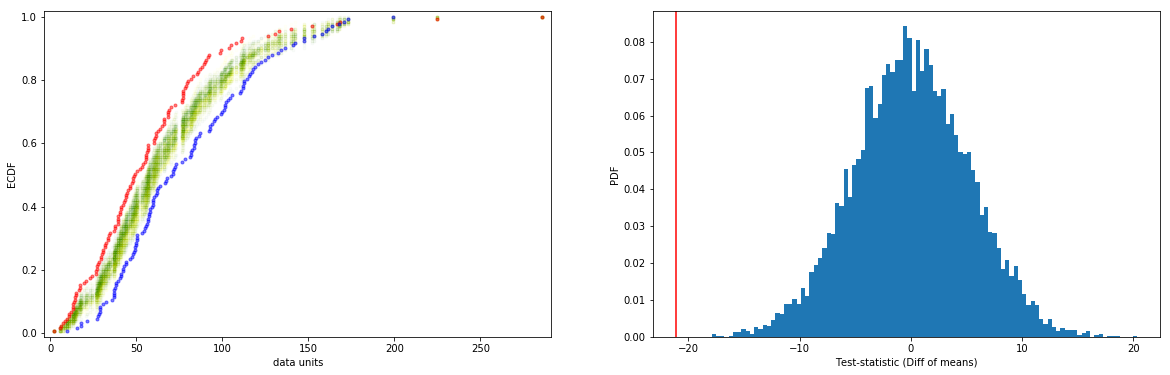

p-value = 0.0


In [14]:
plt.rcParams["figure.figsize"] = (20,6)

def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""
    data = np.concatenate((data1, data2))
    permuted_data = np.random.permutation(data)
    return permuted_data[:len(data1)], permuted_data[len(data1):]

def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""
    perm_replicates = np.empty(size)
    for i in range(size):
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)
        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)
    return perm_replicates

# set up example data
use_rain = True
if use_rain:
    dj, dn = np.genfromtxt('data/ex1.csv',delimiter=",")  # rain fall in Jan or Nov Continuous
else:
    # vote record on Civil Rights - discrete data
    dj, dn = np.array([True] * 153 + [False] * 91), np.array([True] * 136 + [False] * 35)
    
# setting the test statistic to be used
test_stat_function = diff_of_means if use_rain else frac_yea_dems

fig, (ax1,ax2) = plt.subplots(1,2)
for i in range(50):
    # Generate permutation samples
    ps_1, ps_2 = permutation_sample(dj, dn)

    # Compute & plot ECDFs
    x_1, y_1 = ecdf(ps_1)
    x_2, y_2 = ecdf(ps_2)
    _ = ax1.plot(x_1, y_1, marker='.', linestyle='none', color='green', alpha=0.02)
    _ = ax1.plot(x_2, y_2, marker='.', linestyle='none', color='yellow', alpha=0.02)

# Create and plot ECDFs from original data
x_1, y_1 = ecdf(dj)
x_2, y_2 = ecdf(dn)
_ = ax1.plot(x_1, y_1, marker='.', linestyle='none', color='red', alpha=0.5)
_ = ax1.plot(x_2, y_2, marker='.', linestyle='none', color='blue', alpha=0.5)

# Label axes, set margin, and show plot
ax1.margins(0.02)
_ = ax1.set_xlabel('data units')
_ = ax1.set_ylabel('ECDF')

# Compute the test statistic from experimental data: empirical_diff_means (var names assume test stat is diff of mean)
empirical_diff_means = test_stat_function(dj, dn)
# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(dj, dn, test_stat_function, size=10000)

_ = ax2.hist(perm_replicates, density=True, bins=100)
_ = ax2.axvline(empirical_diff_means, color='red')
_ = ax2.set_xlabel('Test-statistic ({})'.format('Diff of means' if use_rain else 'Fraction of category'))
_ = ax2.set_ylabel('PDF')
plt.show()

# Compute p-value: p
p = np.sum(perm_replicates <= empirical_diff_means) / len(perm_replicates)
print('p-value =', p)

## Hacking a Normal 'sample' and comparing with observed data<a id="HS_Norm"></a>

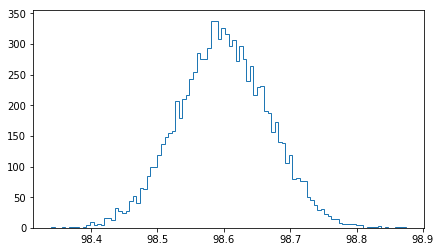

Hacker statistics P-value is 0.0000000
Sample does not indicate that the true population's mean could be 98.6 (reject H0)
The actual number of samples where the mean came out to be 98.2 degF or less was 0
The actual number of samples where the mean came out to be 98.3 degF or less was 0
The actual number of samples where the mean came out to be 98.4 degF or less was 14


In [15]:
plt.rcParams["figure.figsize"] = (7,4)

data = np.random.normal(98.249231, 0.733183, 130)
mu, std = np.mean(data), np.std(data)
muh0 = 98.6

create_means = []
for i in range(10000):
    sam = np.random.normal(muh0, std, size=len(data))
    # - need to actually sample the distribution you create or here end up just creating muh0 again I think!
    create_means.append(np.mean(sam))
    
_ = plt.hist(create_means, bins=100, histtype='step')
plt.show()

# calculating the probablity of getting a mean of 98.2
p = np.sum(np.array(create_means)<=98.2)/len(create_means)
print('Hacker statistics P-value is {:.07f}'.format(p))
# interpret
alpha = 0.05
if p > alpha:
    print("Sample indicates that the true population's mean could be 98.6 (fail to reject H0)")
else:
    print("Sample does not indicate that the true population's mean could be 98.6 (reject H0)")
    
observed_value = 98.2
print('The actual number of samples where the mean came out to be {} degF or less was {}'.format(
    observed_value, np.sum(np.array(create_means)<=observed_value)))
print('The actual number of samples where the mean came out to be {} degF or less was {}'.format(
    observed_value+0.1, np.sum(np.array(create_means)<=observed_value+0.1)))
print('The actual number of samples where the mean came out to be {} degF or less was {}'.format(
    observed_value+0.2, np.sum(np.array(create_means)<=observed_value+0.2)))

## Bootstrapping 1D data - Code examples<a id="BS_1D"></a>

Standard error of the mean: 0.9127684184809649
Standard deviation of the means of all the replicates: 0.9264552115563622


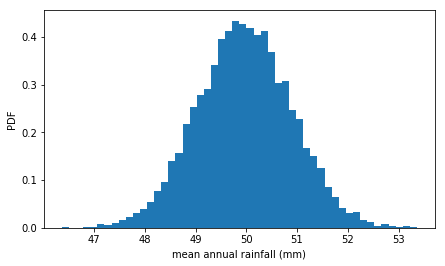

90% Confidence interval from percentiles of normed curve: [48.45550771 51.48599855]
95% Confidence interval from percentiles of normed curve: [48.13531918 51.76022247]
99% Confidence interval from percentiles of normed curve: [47.59594295 52.35522058]


In [39]:
plt.rcParams["figure.figsize"] = (7,4)
def bootstrap_replicate_1d(data, func):
    """Draw a single bootstrap replicate."""
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""
    bs_replicates = np.empty(size)
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)
    return bs_replicates

data = 100*np.random.rand(1000)

# Take 10,000 bootstrap replicates of the mean: bs_replicates
bs_replicates = draw_bs_reps(data, np.mean, 10000)

# Compute and print SEM (standard Error of the Mean)
sem = np.std(data) / np.sqrt(len(data))
print('Standard error of the mean: {}'.format(sem))

# Compute and print standard deviation of bootstrap replicates
bs_std = np.std(bs_replicates)
print('Standard deviation of the means of all the replicates: {}'.format(bs_std))
# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=50, density=True)
_ = plt.xlabel('mean annual rainfall (mm)')
_ = plt.ylabel('PDF')
plt.show()      

# confidence interval
print('90% Confidence interval from percentiles of normed curve: {}'.format(np.percentile(bs_replicates, [5,95])))
print('95% Confidence interval from percentiles of normed curve: {}'.format(np.percentile(bs_replicates, [2.5,97.5])))
print('99% Confidence interval from percentiles of normed curve: {}'.format(np.percentile(bs_replicates, [0.5,99.5])))

##  Calculating Confidence intervals from Frequentist Techniques ( z and t )
just looking at your sample of data and figuring out when a value look suspicious

In [26]:
data = np.random.rand(230) + np.random.normal(1.75, 0.20, 230)
# using the common 95% conf level, alpha=0.05
alpha = 0.05   
two_tail_clevel = alpha/2

# standard error mean
temp_sem = data.std()/(np.sqrt(len(data)))

# z stats
crit_z = st.norm.ppf(1-two_tail_clevel)
print('crit_z for 2 tail {}% confidence is:{:.3f}'.format((1-alpha)*100, crit_z))
# z stat margin of error
moe = crit_z * temp_sem
print('Margin of error: {:.5f}'.format(moe))
# confidence interval
[cil, ciu] = data.mean() + np.array([-1, 1]) * moe
print('Confidence interval is :   {:.5} to {:.5}'.format(cil, ciu))

# t stats
crit_t = st.t.ppf(1-two_tail_clevel, len(data) - 1)
print('crit_t for 2 tail {}% confidence is:{:.3f}'.format((1-alpha)*100, crit_t))
# t stats margin of error
moe = crit_t * temp_sem
print('Margin of error: {:.5f}'.format(moe))
# confidence interval
[cil, ciu] = data.mean() + np.array([-1, 1]) * moe
print('Confidence interval is :   {:.5} to {:.5}'.format(cil, ciu))

crit_z for 2 tail 95.0% confidence is:1.960
Margin of error: 0.04181
Confidence interval is :   2.1991 to 2.2827
crit_t for 2 tail 95.0% confidence is:1.970
Margin of error: 0.04203
Confidence interval is :   2.1989 to 2.283


### Calculating prediction interval when population has unknown mean, unknown variance

In [27]:
# t-based prediction interval 
pi_width = crit_t * data.std() * np.sqrt((1 + 1/(len(data))))
[pil, piu] = data.mean() + np.array([-1, 1]) * pi_width
print('The 95% prediction interval for the of the population is         {:.5} to {:.5}'.format(pil,piu))

The 95% prediction interval for the of the population is         1.6021 to 2.8798


/Users/alisonkline/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/alisonkline/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


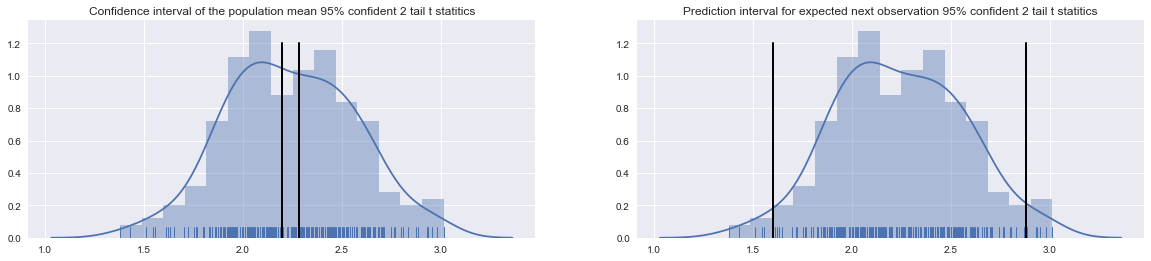

In [29]:
sns.set()
plt.rcParams["figure.figsize"] = (20,4)
fig, (ax1,ax2) = plt.subplots(1,2)
sns.distplot(data, bins = 15, rug = True, ax=ax1)
ax1.plot([cil,cil] , [1.2, 0], linewidth = 2, color = "k")
ax1.plot([ciu,ciu], [1.2, 0], linewidth = 2, color = "k")
ax1.set_title('Confidence interval of the population mean 95% confident 2 tail t statitics')

sns.distplot(data, bins = 15, rug = True, ax=ax2)
ax2.plot([pil,pil], [1.2, 0], linewidth = 2, color = "k")
ax2.plot([piu,piu], [1.2, 0], linewidth = 2, color = "k")
ax2.set_title('Prediction interval for expected next observation 95% confident 2 tail t statitics')
plt.show()

## Bootstrapping with 2D data<a id="BS_2D"></a>

90% Confidence interval on slope from percentiles of normed curve: [3.43789549 4.34004118]
95% Confidence interval on slope from percentiles of normed curve: [3.35747511 4.46429127]
99% Confidence interval on slope from percentiles of normed curve: [3.20478945 4.56220647]


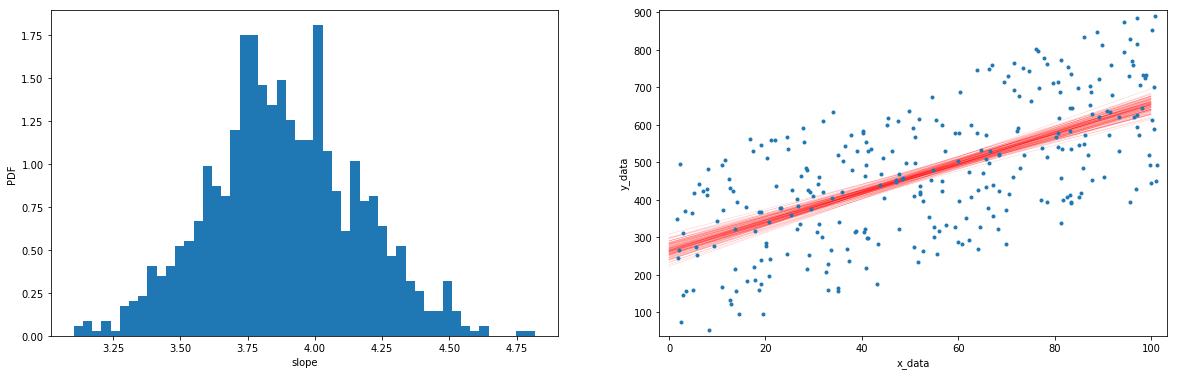

In [17]:
plt.rcParams["figure.figsize"] = (20,6)

def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""
    # Array of indicies to sample from
    inds = np.arange(len(x))

    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)

    return bs_slope_reps, bs_intercept_reps

x_data = 100*np.random.rand(300) + 1.5
y_data = 2 + 4*x_data + 500*np.random.rand(300)   # adding random error to y

# Generate replicates of slope and intercept using pairs bootstrap
bs_slope_reps, bs_intercept_reps = draw_bs_pairs_linreg(x_data, y_data, 1000)

# Compute and print CI's for slope
print('90% Confidence interval on slope from percentiles of normed curve: {}'.format(np.percentile(bs_slope_reps, [5,95])))
print('95% Confidence interval on slope from percentiles of normed curve: {}'.format(np.percentile(bs_slope_reps, [2.5,97.5])))
print('99% Confidence interval on slope from percentiles of normed curve: {}'.format(np.percentile(bs_slope_reps, [0.5,99.5])))

fig, (ax1,ax2) = plt.subplots(1,2)

# Plot the histogram
_ = ax1.hist(bs_slope_reps, bins=50, density=True)
_ = ax1.set_xlabel('slope')
_ = ax1.set_ylabel('PDF')

# plotting data and first 100 bootstrap lines 
# x-values for bootstrap lines: x (only two points as lines are straight)
x = np.array([0,100])
# Plot the first 100 bootstrap lines
for i in range(100):
    _ = ax2.plot(x, bs_slope_reps[i]*x + bs_intercept_reps[i],
                 linewidth=0.5, alpha=0.2, color='red')

# Scatter plot the data
_ = ax2.plot(x_data, y_data, marker='.', linestyle='none')

# Label axes, set the margins, and show the plot
_ = ax2.set_xlabel('x_data')
_ = ax2.set_ylabel('y_data')
ax2.margins(0.02)
plt.show()

## Hypothesis Test with correlation
To test if two variables observed correlation is actually due only to chance
- Null Hypothesis = the two values are completely independent
- Using [pearson_r function](#PCoeff) to calculate the test statistic

Note options with pro/cons: 
- Do a pairs bootstrap: Sample pairs of observed data with replacement to generate a new set of (illiteracy, fertility) data.
<br><font size=small color=gray>Pairs bootstrap will get you a confidence interval on the Pearson correlation. You can get a confidence interval for its value. You would find, for example, that it cannot be close to zero. But this is not a simulation of the null hypothesis.</font>
- Do a bootstrap sampling in which you sample 162 illiteracy values with replacement and then 162 fertility values with replacement.
<br><font size=small color=gray>This works and is a legitimate way to simulate the data. The pairings are now random. However, it is not preferred because it is not exact like a permutation test is.</font>
- Do a permutation test: Permute the illiteracy values but leave the fertility values fixed to generate a new set of (illiteracy, fertility) data.
<br><font size=small color=gray>BEST, this exactly simulates the null hypothesis and does so more efficiently than the last option. It is exact because it uses all data and eliminates any correlation because which illiteracy value pairs to which fertility value is shuffled.</font>
- Do a permutation test: Permute both the illiteracy and fertility values to generate a new set of (illiteracy, fertility data).
<br><font size=small color=gray>This works perfectly, and is exact because it uses all data and eliminates any correlation because which illiteracy value pairs to which fertility value is shuffled. However, it is not necessary, and computationally inefficient, to permute both illiteracy and fertility.</font>

In [18]:
# get data
di, df = np.genfromtxt('data/ex2.csv',delimiter=",")

# Compute observed correlation: r_obs
r_obs = pearson_r(di, df)

# Initialize permutation replicates: perm_replicates
perm_replicates = np.empty(10000)

# Draw replicates
for i in range(10000):
    # Permute illiteracy measurments: illiteracy_permuted
    di_permuted = np.random.permutation(di)

    # Compute Pearson correlation
    perm_replicates[i] = pearson_r(di_permuted, df)

# Compute p-value: p
p = np.sum(perm_replicates >= r_obs)/len(perm_replicates)
print('p-val =', p)

p-val = 0.0


You got a **p-value of zero**. In hacker statistics, this means that your p-value is very low, since you never got a single replicate in the 10,000 you took that had a Pearson correlation greater than the observed one. You could try increasing the number of replicates you take to continue to move the upper bound on your p-value lower and lower.

## Bootstrap hypothesis test (Control & Treated) - Effect of insecticide on Bee sperm
- Visualize the data. Control and Treated (ie exposed to insecticide)
- Null Hypothesis = "On average, male bees treated with neonicotinoid insecticide have the same number of active sperm per milliliter of semen than do untreated male bees. "
- Test statistic = [difference of means](#ComTS)

The p-value is small, most likely less than 0.0001, since you never saw a bootstrap replicated with a difference of means at least as extreme as what was observed. When done with 10 million replicates, p-value = 2e-05. This is strong evidence that insecticide is having an impact on Bee sperm.

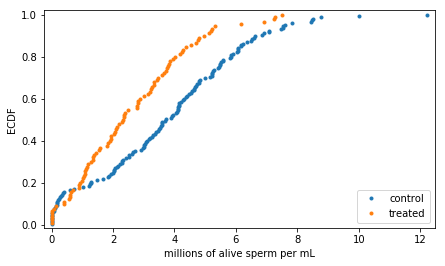

p-value = 0.0


In [19]:
plt.rcParams["figure.figsize"] = (7,4)

# get data
control = np.genfromtxt('data/ex3a.csv',delimiter=",")
treated = np.genfromtxt('data/ex3b.csv',delimiter=",")

fig, ax1 = plt.subplots()

# Compute values for and plot ECDFs
x_control, y_control = ecdf(control)
x_treated, y_treated = ecdf(treated)
ax1.plot(x_control, y_control, marker='.', linestyle='none')
ax1.plot(x_treated, y_treated, marker='.', linestyle='none')

# Label and show plot
ax1.margins(0.02)
ax1.legend(('control', 'treated'), loc='lower right')
ax1.set_xlabel('millions of alive sperm per mL')
ax1.set_ylabel('ECDF')
plt.show()

# Compute the difference in mean sperm count: diff_means
diff_means = diff_of_means(control, treated)   # using function doesn't add much

# Compute mean of pooled data: mean_count
mean_count = np.mean(np.concatenate((control,treated)))

# Generate shifted data sets
control_shifted = control - np.mean(control) + mean_count
treated_shifted = treated - np.mean(treated) + mean_count

# Generate bootstrap replicates using shifted data
bs_reps_control = draw_bs_reps(control_shifted, np.mean, size=10000)
bs_reps_treated = draw_bs_reps(treated_shifted, np.mean, size=10000)

# Get replicates of difference of means: bs_replicates
bs_replicates = bs_reps_control - bs_reps_treated

# Compute and print p-value: p
p = np.sum(bs_replicates >= np.mean(control) - np.mean(treated))/ len(bs_replicates)
print('p-value =', p)

## One sample tests:
### t test
-  H0 = true mean of population is some value 'true_pop_mean'
-  Ha = true mean of population is some other value => two tail
-  Ha' = true mean of population is higher or lower => 1 tail
-  significance level = 5% or (95% confident)
-  Test statistic = mean

In [20]:
data = np.round(np.random.normal(1.75, 0.20, 200), 2) + np.random.exponential(2,200)

In [21]:
true_pop_mean = 4.3
alpha = 0.05     # use as cut-off for 1 tail tests
two_t_cut = alpha/2  # use as cut-off for 2 tail tests

sample_mean = np.mean(data)
# ddof is'Delta Degrees of Freedom, the divisor used in calculating is N-ddof
sample_standard_dev = np.std(data, ddof=1)
n = len(data)


print('MANUAL TEST')
## Calculate the t-statistic
t = (sample_mean-true_pop_mean)/(sample_standard_dev/np.sqrt(n))

## Compare with the critical t-value
#Degrees of freedom
deg_free = n - 1
# p-value after comparison with the t (can use t.sf(x, df) the survival function (i.e. 1 - t.cdf(x, df)).)

p = 2*(1 - st.t.cdf(abs(t),df=deg_free))    # 2* for the two tail nature of this test

print("   t = {:.8f}".format(t))
print("   p = {:.8f}".format(p))

print('AUTOMATED TEST')
## Cross Checking with the internal scipy function
#t2, p2 = stats.ttest_ind(a,b)  # 2-sample
t1, p1 = st.ttest_1samp(data, true_pop_mean)       # 1-sample two sided test
print("   t = {:.8f}".format(t1))
print("   p = {:.8f}".format(p1))

MANUAL TEST
   t = -3.78580659
   p = 0.00020277
AUTOMATED TEST
   t = -3.78580659
   p = 0.00020277


### z test 
for completeness - rarely appropriated for this as test statistic here is a mean

In [38]:
print('MANUAL TEST')
## Calculate the t-statistic
z = (sample_mean-true_pop_mean)/(sample_standard_dev/np.sqrt(n))

## Compare with the critical z-value
# p-value after comparison with the z (can use t.sf(x, df) the survival function (i.e. 1 - t.cdf(x, df)).)
p = 2*(1 - st.norm.cdf(abs(z)))    # 2* for the two tail nature of this test

print("   z = {:.8f}".format(z))
print("   p = {:.8f}".format(p))

print('AUTOMATED TEST')
## Cross Checking with the internal scipy function
z1, p1 = weightstats.ztest(data, value=true_pop_mean)
print("   z = {:.8f}".format(z1))
print("   p = {:.8f}".format(p1))

MANUAL TEST
   z = -4.08019724
   p = 0.00004500
AUTOMATED TEST
   z = -4.08019724
   p = 0.00004500


## Creating data<a id="Create"></a>

- raw numpy data __[Array Creation Routines](https://docs.scipy.org/doc/numpy/reference/routines.array-creation.html)__
- __[Random Sampling](https://docs.scipy.org/doc/numpy/reference/routines.random.html)__

In [ ]:
# numpy.random.normal(loc=dist mean, scale=dist standard dev, size=number of samples)
data = np.round(np.random.normal(1.75, 0.20, 5000), 2)  
# numpy.random.uniform(low=0.0, high=1.0, size=None)
data = np.random.uniform(-2,5,1000)
# numpy.random.binomial(n, p, size=None)
data = np.random.binomial(10,0.05,1000)
# numpy.random.poisson(lam=1.0, size=None)¶
data = np.random.poisson(2,1000)
# numpy.random.exponential(scale=mean, size=None)
data = np.random.exponential(2,1000)

# numpy.random.random(size=None): Return random floats in the half-open interval [0.0, 1.0)¶
np.random.random(1000)

# numpy.random.rand(d0, d1, ..., dn): Random values in a given shape. values from 0-1¶
x = 100*np.random.rand(1000)
# calculating a y based on an x
y = list(map(lambda a: (a-2)**2*(a+1), x))
# adding random error to y
y = 2 + 4*x + 500*np.random.rand(1000)   

# np.array((object, dtype=None, copy=True, order='K', subok=False, ndmin=0)¶)
t = np.array(range(0,100))
# np.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None)
t = np.linspace(0, 200, 100)    # Return evenly spaced numbers over a specified interval.
# np.arange([start, ]stop, [step, ]dtype=None): Return evenly spaced values within a given interval.¶
t = np.arange(0,20) # similar to python range but returning an ndarray rather than list
# arange is half open [start,stop), linspace has more careful handling of endpoints
 
data = np.matrix([[1,2,3,4],[5,6,7,8]])                         # np matrix
df = pd.DataFrame({'x':x, 'y':y})                               # pandas DataFrame
df = pd.DataFrame({'A': 'foo bar foo bar foo bar foo foo'.split(),
                   'B': 'one one two three two two one three'.split(),
                   'C': np.arange(8), 'D': np.arange(8) * 2})   # pd df, each list => col 
df = pd.DataFrame([['small', 'small', 'large', 'large']
                        , [1976, 1976, 1977, 1977]
                        , [710, 825, 105, 835]])   # pd df, each list => row
df = pd.DataFrame(np.zeros((100,3)))                     # filled with zeros (note the (tuple) with brackets)
df = pd.read_csv('data/CSF_ds1.csv',delimiter=",") # first row has column headers in it.